<a href="https://colab.research.google.com/github/bhushanmandava/Time-Series/blob/main/Air_miles_holt_winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

#

In [32]:
df = pd.read_csv("airmiles.csv",index_col="Date",parse_dates=True,dayfirst = True)
df.head(20)

,airmiles
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391
1996-06-01,38772238
1996-07-01,40395657
1996-08-01,41738499
1996-09-01,33580773


In [33]:
df.isna().sum()

,0
airmiles,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113 entries, 1996-01-01 to 2005-05-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   airmiles  113 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [35]:
df.isna().sum()

,0
airmiles,0


In [36]:
df = df.asfreq("MS")
df.index

DatetimeIndex(['1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01',
               ...
               '2004-08-01', '2004-09-01', '2004-10-01', '2004-11-01',
               '2004-12-01', '2005-01-01', '2005-02-01', '2005-03-01',
               '2005-04-01', '2005-05-01'],
              dtype='datetime64[ns]', name='Date', length=113, freq='MS')

In [37]:
df.isna().sum()

,0
airmiles,0


In [38]:
df = df.rename(columns={'airmiles': 'y'})
df.head(20)

,y
Date,
1996-01-01,30983174
1996-02-01,32147663
1996-03-01,38342975
1996-04-01,35969113
1996-05-01,36474391
1996-06-01,38772238
1996-07-01,40395657
1996-08-01,41738499
1996-09-01,33580773


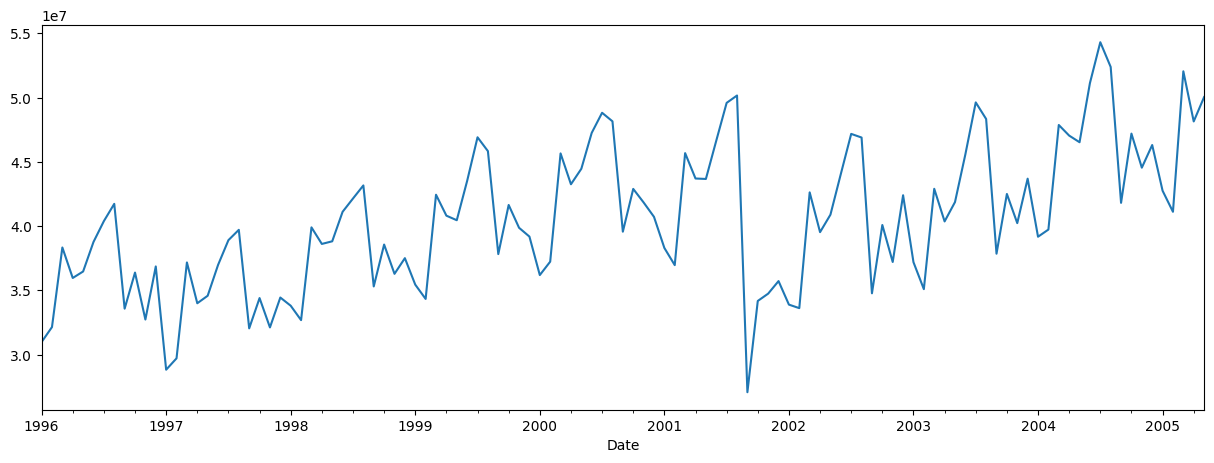

In [40]:
df['y'].plot(figsize=(15,5))
plt.show()

<ipython-input-42-a138e26e5c0a>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['y'].resample('M').mean())


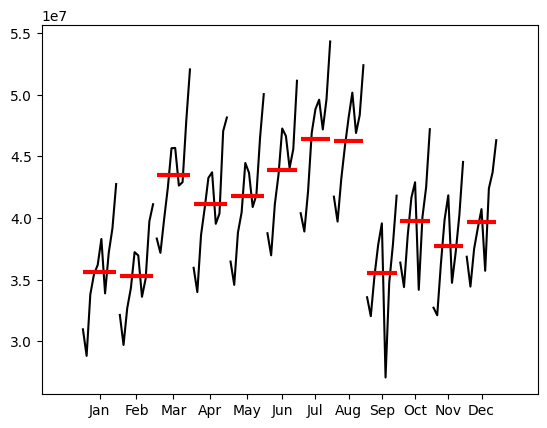

In [42]:
month_plot(df['y'].resample('M').mean())
plt.show()

<ipython-input-43-4d48e3bb5927>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['y'].resample('Q').mean())


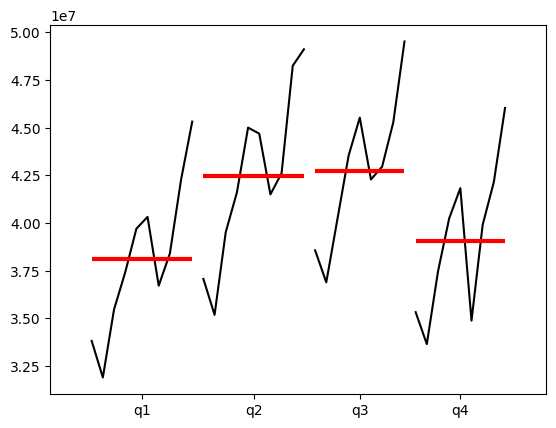

In [43]:
quarter_plot(df['y'].resample('Q').mean())
plt.show()

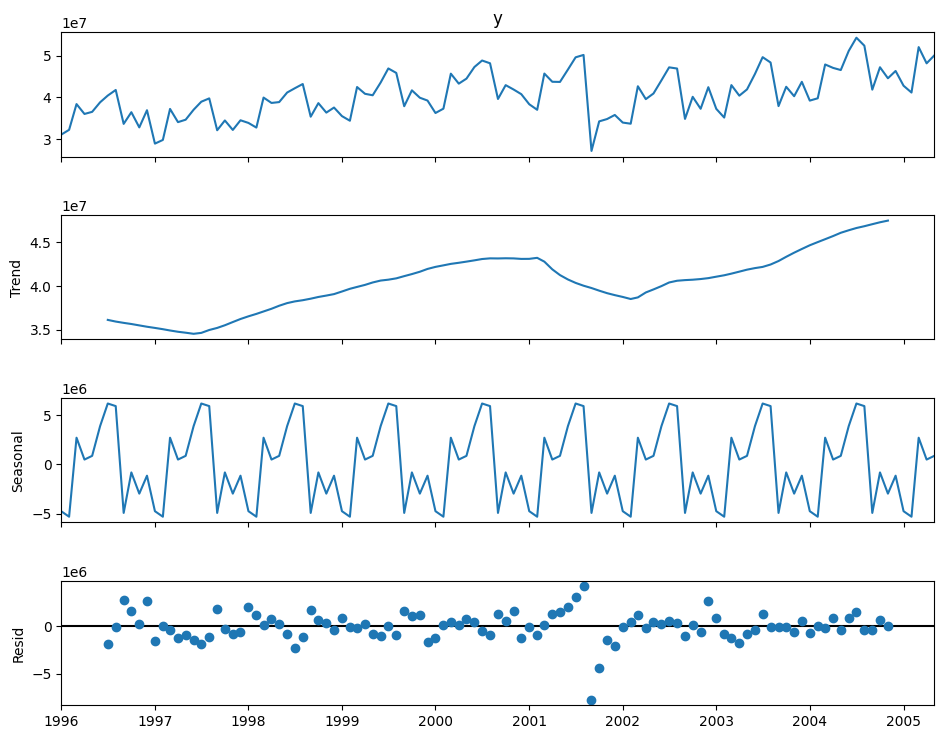

In [45]:
decomposition=seasonal_decompose(df['y'],model='add',period=12)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

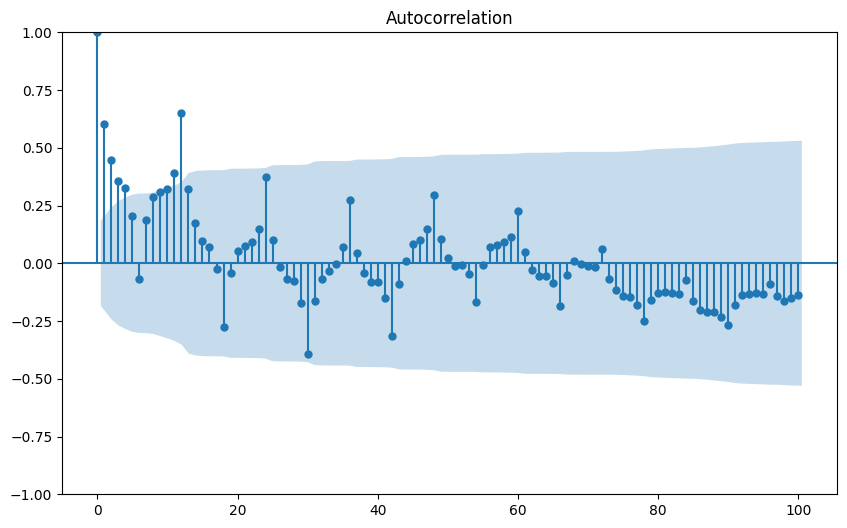

In [46]:
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['y'], lags = 100, ax = ax)
plt.show()

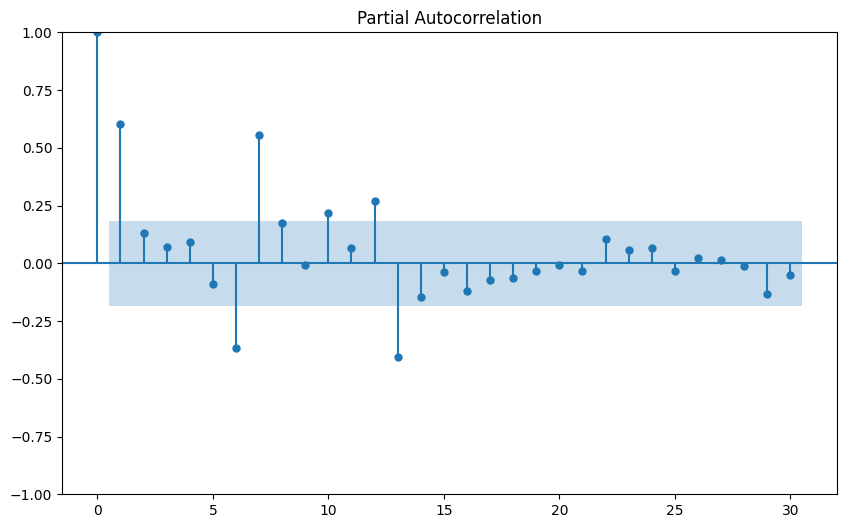

In [47]:
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['y'], lags = 30, ax = ax)
plt.show()

In [48]:
train, test = df.iloc[:-12,:], df.iloc[-12:, :]
test

,y
Date,
2004-06-01,51134050
2004-07-01,54317314
2004-08-01,52392985
2004-09-01,41816777
2004-10-01,47205665
2004-11-01,44553653
2004-12-01,46316602
2005-01-01,42760657
2005-02-01,41120838


In [49]:
model = ExponentialSmoothing(train,
                             trend = 'mul',
                             seasonal = 'mul',
                             seasonal_periods = 12).fit()

# Forecast future values for the length of the test set
predictions = model.forecast(steps = len(test)).rename("Holt-Winters")
predictions

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Holt-Winters
2004-06-01,4.989814e+07
2004-07-01,5.232020e+07
2004-08-01,5.246731e+07
2004-09-01,4.147231e+07
2004-10-01,4.632250e+07
2004-11-01,4.366543e+07
2004-12-01,4.583298e+07
2005-01-01,4.142760e+07
2005-02-01,4.104454e+07
2005-03-01,5.053423e+07


In [50]:
def model_assesment(train,test,predictions,chart_title):
  plt.figure(figsize=(10,6))
  plt.plot(train, label='Train')
  plt.plot(test, label='Test')
  plt.plot(predictions, label='Predictions')
  plt.title(chart_title)
  plt.legend()
  plt.show()
  mae = mean_absolute_error(test, predictions)
  rmse = root_mean_squared_error(test, predictions)
  mape = mean_absolute_percentage_error(test, predictions)

  # print the metrics value
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")


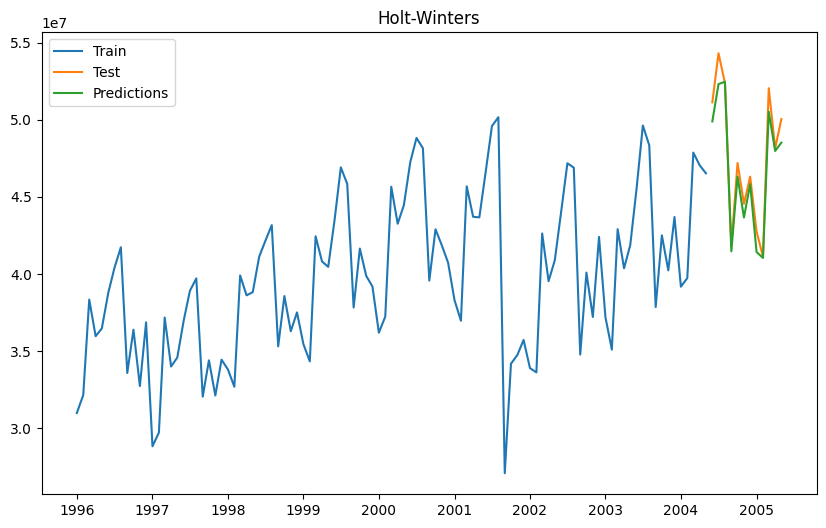

The MAE is 877575.16
The RMSE is 1075653.07
The MAPE is 1.80 %


In [52]:
model_assesment(train, test, predictions, "Holt-Winters")

In [59]:
model = ExponentialSmoothing(df['y'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
prediction = model.forecast(steps=12).rename("Holt-Winters")
prediction

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Holt-Winters
2005-06-01,5.317705e+07
2005-07-01,5.585684e+07
2005-08-01,5.559980e+07
2005-09-01,4.374628e+07
2005-10-01,4.922822e+07
2005-11-01,4.655935e+07
2005-12-01,4.885796e+07
2006-01-01,4.429477e+07
2006-02-01,4.367190e+07
2006-03-01,5.397746e+07


In [57]:
def plot_future(y,forecast,title):
  plt.figure(figsize=(10,4))
  plt.plot(y,label='Train')
  plt.plot(forecast,label='Forecast')
  plt.title(title)
  plt.legend()
  plt.show()

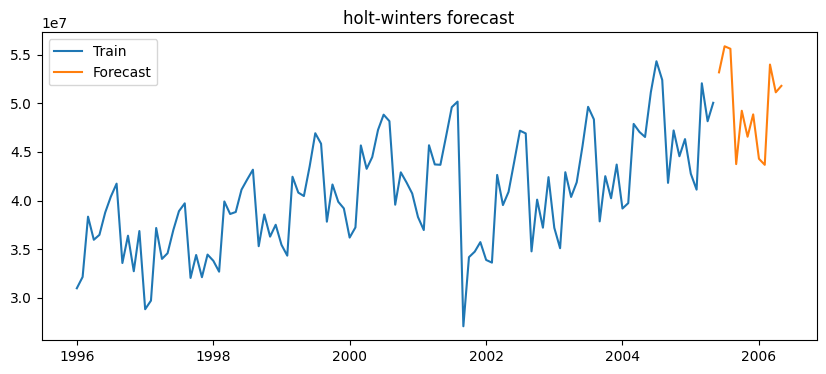

In [60]:
plot_future(df['y'],prediction, "holt-winters forecast")